In [2]:
#1 build a model 
#2 add drop out layer 
#3 Early stopping 


In [81]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

In [82]:
from tensorflow.keras.datasets import mnist 

In [83]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


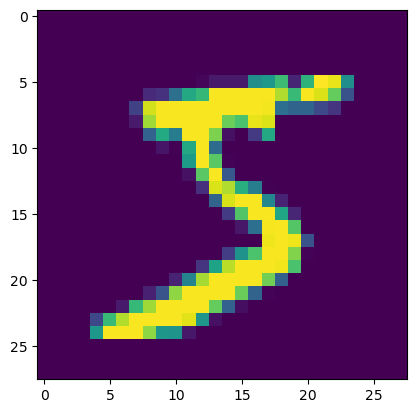

In [85]:
# display images 
plt.imshow(x_train[0])

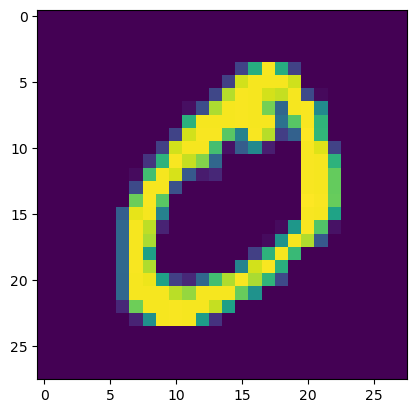

In [86]:
#2nd image 
plt.imshow(x_train[1])

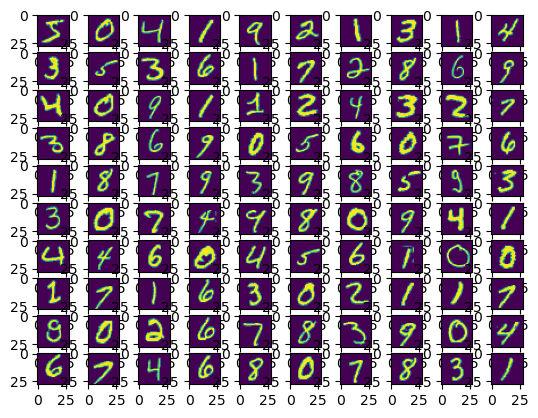

In [87]:
# display images

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28))

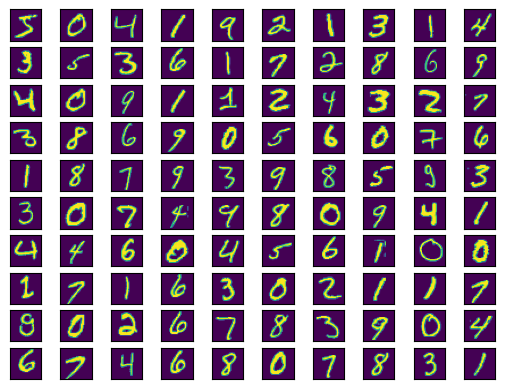

In [88]:
# display images

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.xticks([])
    plt.yticks([])

In [89]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [90]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [91]:
# 0 to 255 => scale it = Dividing by 255 

In [92]:
2**8

256

In [93]:
X_train=x_train/255
X_test=x_test/255

In [94]:
X_train.shape

(60000, 28, 28)

In [95]:
X_test.shape

(10000, 28, 28)

In [96]:
# convert 3 D  data into 

In [97]:
#  babsic example 
arr1=np.array(np.random.randint(1,100,27))
arr1

array([19, 35, 81, 94, 80, 69, 48, 38, 79, 83, 98, 42, 87, 78,  3, 58, 78,
       79, 38, 26, 28, 11, 13,  5, 79, 83, 24])

In [98]:
#28rows an d28 columns 
28*28

784

In [99]:
X_train =X_train.reshape([60000,784])  # 28 * 28 =784 28 rows and 28 column 
X_test=X_test.reshape([10000,784])

In [100]:
X_train.shape

(60000, 784)

In [101]:
X_test.shape

(10000, 784)

In [102]:
# build a  model 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad,Adam,RMSprop

In [103]:
model=Sequential()

In [104]:
# first hidden layer : Neurons 128
model.add(Dense(units=128,activation='relu',input_shape=(784,)))

In [105]:
# second hidden layer 
model.add(Dense(units=64,activation='relu'))

In [106]:
# third hidden layer 
model.add(Dense(units=32,activation='relu'))

In [107]:
# output layer  : nodes 10  we  have 10 labels and nodes is 10 
model.add(Dense(units=10,activation='softmax'))


In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


# if we have multiple labels or we can say that more than2 labels we use soft max function 

In [109]:
import tensorflow 

In [110]:
# compile 
model.compile(optimizer=RMSprop(learning_rate=0.01),
                                loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

In [111]:
# train model 
result=model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3738 - accuracy: 0.9003
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2962 - accuracy: 0.9370
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2979 - accuracy: 0.9444
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2944 - accuracy: 0.9469
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2833 - accuracy: 0.9507


In [112]:
#  let us predict output 
# training 
y_train_pred=np.argmax(model.predict(X_train),axis=1)
y_train_pred


1875/1875 [==============================] - 6s 3ms/step


array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [113]:
y_test_pred=np.argmax(model.predict(X_test),axis=1)
y_test_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [114]:
# evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score

In [115]:
# training 
confusion_matrix(y_train,y_train_pred)

array([[5775,    0,    0,    0,    0,    3,   62,    5,   68,   10],
       [   3, 6629,   23,   11,    3,    2,   14,    7,   47,    3],
       [  14,   11, 5630,   11,    7,    3,   49,   68,  160,    5],
       [   3,   21,   57, 5686,    5,   55,   11,   32,  225,   36],
       [   5,   15,    1,    2, 5337,    2,   64,   18,   79,  319],
       [   6,    6,    2,   56,    3, 5131,  121,    7,   70,   19],
       [  21,    4,    1,    0,    2,   11, 5861,    0,   18,    0],
       [   3,   45,   15,   16,    6,    2,    1, 6051,   75,   51],
       [  26,   45,   13,   27,    3,   22,   71,    5, 5483,  156],
       [  17,    7,    0,   10,    8,   24,    1,   44,  128, 5710]],
      dtype=int64)

In [116]:
accuracy_score(y_train,y_train_pred)

0.9548833333333333

In [117]:
# testing accuracy 
accuracy_score(y_test,y_test_pred)s

0.9478

In [118]:
confusion_matrix(y_test,y_test_pred)

array([[ 962,    1,    0,    0,    0,    2,    9,    2,    4,    0],
       [   0, 1118,    3,    3,    0,    1,    6,    0,    3,    1],
       [   5,    2,  975,    5,    0,    0,    7,   12,   25,    1],
       [   0,    1,   12,  923,    0,   14,    1,    7,   43,    9],
       [   1,    1,    1,    0,  888,    0,   18,    3,   16,   54],
       [   3,    0,    0,   13,    0,  836,   20,    3,   14,    3],
       [   6,    2,    3,    0,    4,    1,  934,    0,    8,    0],
       [   2,   14,    9,    4,    1,    1,    0,  975,   13,    9],
       [   7,    4,    3,    5,    3,    8,   10,    2,  905,   27],
       [   2,    4,    0,    6,    3,    3,    1,    2,   26,  962]],
      dtype=int64)

In [119]:
# accuracy is  low so we have to incrase the epochs atleast 100 